In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/DeepSDF/eval/mesh'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
GOOGLE_DRIVE_PATH = 'drive/MyDrive/DeepSDF/eval/mesh'
print(os.listdir(GOOGLE_DRIVE_PATH))
# print(GOOGLE_DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['trained_models.zip', 'can', 'mug', 'camera', 'bowl', 'airplane']


In [2]:
!pip install trimesh
!pip install open3d
!pip install matplotlib

In [ ]:
!ls drive/MyDrive/DeepSDF/eval/mesh

airplane  bowl	camera	can  mug  trained_models.zip


In [3]:
import open3d as o3d
import numpy as np

o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Error)

def mesh_to_point_cloud(mesh_file, rotate_axis=False, num_points=10000):
    """
    Convert a mesh file to a point cloud.

    mesh_file: File path to the mesh file (e.g., in .obj format)
    rotate_x_axis: Boolean flag indicating whether to rotate the resulting point cloud 90 degrees clockwise about the x-axis
    apply_smoothing: Boolean flag indicating whether to apply a smoothing filter to the point cloud
    num_points: Number of points to sample uniformly from the point cloud

    Returns: Numpy array representing the point cloud
    """

    # Read the mesh
    mesh = o3d.io.read_triangle_mesh(mesh_file)

    point_cloud = mesh.sample_points_uniformly(number_of_points=num_points)

    np_pc = np.asarray(point_cloud.points)

    # Rotate the point cloud if specified
    # DONT USE FOR AIRPLANE
    if rotate_axis:

        # USE FOR BOWL (on Gen)
        # rotation_matrix = np.array([[1, 0, 0], [0, np.cos(np.pi/2), -np.sin(np.pi/2)], [0, np.sin(np.pi/2), np.cos(np.pi/2)]])
        # np_pc = np.dot(np_pc, rotation_matrix)

        # USE FOR CAMERA (on Ground Truth)
        # Rotation around X-axis (90 degrees)
        theta_x = -np.pi / 2
        rotation_matrix_x = np.array([
            [1, 0, 0],
            [0, np.cos(theta_x), -np.sin(theta_x)],
            [0, np.sin(theta_x), np.cos(theta_x)]
        ])

        # # Rotation around Y-axis (90 degrees)
        # theta_y = np.pi / 2
        # rotation_matrix_y = np.array([
        #     [np.cos(theta_y), 0, np.sin(theta_y)],
        #     [0, 1, 0],
        #     [-np.sin(theta_y), 0, np.cos(theta_y)]
        # ])
        # # Combine rotations (X followed by Y)
        # rotation_matrix_xy = np.dot(rotation_matrix_y, rotation_matrix_x)
        # np_pc = np.dot(np_pc, rotation_matrix_xy)

        # USE FOR CAN (on Ground Truth)
        # Rotation around X-axis (90 degrees)
        # theta_x = -np.pi /2
        # rotation_matrix_x = np.array([
        #     [1, 0, 0],
        #     [0, np.cos(theta_x), -np.sin(theta_x)],
        #     [0, np.sin(theta_x), np.cos(theta_x)]
        # ])
        # # Rotation around Y-axis (90 degrees)
        # theta_y = -np.pi / 2
        # rotation_matrix_y = np.array([
        #     [np.cos(theta_y), 0, np.sin(theta_y)],
        #     [0, 1, 0],
        #     [-np.sin(theta_y), 0, np.cos(theta_y)]
        # ])
        # # Rotation around Z-axis (90 degrees)
        # # theta_z = np.pi /2
        # # rotation_matrix_z = np.array([
        # #     [np.cos(theta_z), -np.sin(theta_z), 0],
        # #     [np.sin(theta_z), np.cos(theta_z), 0],
        # #     [0, 0, 1]
        # # ])
        # # Combine rotations (X followed by Y followed by Z)
        # # rotation_matrix_xyz = np.dot(rotation_matrix_z, np.dot(rotation_matrix_y, rotation_matrix_x))
        # rotation_matrix_xyz = np.dot(rotation_matrix_y, rotation_matrix_x)
        # # Example usage: Apply the rotation matrix to a point cloud (np_pc)
        # np_pc = np.dot(np_pc, rotation_matrix_xyz)

        # USE FOR MUG (on Ground Truth)
        # # Rotation around X-axis (90 degrees)
        # theta_x = np.pi/2
        # rotation_matrix_x = np.array([
        #     [1, 0, 0],
        #     [0, np.cos(theta_x), -np.sin(theta_x)],
        #     [0, np.sin(theta_x), np.cos(theta_x)]
        # ])
        # # Rotation around Y-axis (90 degrees)
        # theta_y = np.pi / 2
        # rotation_matrix_y = np.array([
        #     [np.cos(theta_y), 0, np.sin(theta_y)],
        #     [0, 1, 0],
        #     [-np.sin(theta_y), 0, np.cos(theta_y)]
        # ])
        # # Rotation around Z-axis (90 degrees)
        # theta_z = np.pi
        # rotation_matrix_z = np.array([
        #     [np.cos(theta_z), -np.sin(theta_z), 0],
        #     [np.sin(theta_z), np.cos(theta_z), 0],
        #     [0, 0, 1]
        # ])
        # # Combine rotations (X followed by Y followed by Z)
        # rotation_matrix_xyz = np.dot(rotation_matrix_z, np.dot(rotation_matrix_y, rotation_matrix_x))
        # # rotation_matrix_xyz = np.dot(rotation_matrix_y, rotation_matrix_x)
        # # Example usage: Apply the rotation matrix to a point cloud (np_pc)
        # np_pc = np.dot(np_pc, rotation_matrix_xyz)




    return np_pc
    # return point_cloud


In [4]:
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_point_clouds(gt_points, gen_points):
    # Convert Open3D point clouds to NumPy arrays
    # gt_points = np.asarray(gt_point_cloud.points)
    # gen_points = np.asarray(gen_point_cloud.points)

    # Visualize the point clouds in 3D from different angles
    fig = plt.figure(figsize=(12, 4))

    # Plot from the first angle
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(gt_points[:, 0], gt_points[:, 1], gt_points[:, 2], s=1, color='blue', label='Ground Truth')
    ax1.scatter(gen_points[:, 0], gen_points[:, 1], gen_points[:, 2], s=1, color='red', label='Generated')
    ax1.set_title('Angle 1')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()

    # Plot from the second angle
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.scatter(gt_points[:, 0], gt_points[:, 1], gt_points[:, 2], s=1, color='blue', label='Ground Truth')
    ax2.scatter(gen_points[:, 0], gen_points[:, 1], gen_points[:, 2], s=1, color='red', label='Generated')
    ax2.set_title('Angle 2')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.view_init(elev=20, azim=45)  # Adjust the view angle

    # Plot from the third angle
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.scatter(gt_points[:, 0], gt_points[:, 1], gt_points[:, 2], s=1, color='blue', label='Ground Truth')
    ax3.scatter(gen_points[:, 0], gen_points[:, 1], gen_points[:, 2], s=1, color='red', label='Generated')
    ax3.set_title('Angle 3')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.view_init(elev=0, azim=90)  # Adjust the view angle

    plt.tight_layout()
    plt.show()


In [5]:
import numpy as np

def chamfer_distance(point_cloud1, point_cloud2):

    # Convert Open3D Vector3dVector to NumPy array
    # points1 = np.asarray(point_cloud1.points)
    # points2 = np.asarray(point_cloud2.points)

    # Step 1: Compute pairwise distances
    distances1 = np.linalg.norm(point_cloud1[:, np.newaxis, :] - point_cloud2, axis=-1)
    distances2 = np.linalg.norm(point_cloud2[:, np.newaxis, :] - point_cloud1, axis=-1)

    # Step 2: Find nearest neighbors
    nearest_neighbors1 = np.argmin(distances1, axis=1)
    nearest_neighbors2 = np.argmin(distances2, axis=1)

    # Step 3: Calculate Chamfer Distance
    chamfer_dist1 = np.mean(np.min(distances1, axis=1))
    chamfer_dist2 = np.mean(np.min(distances2, axis=1))

    chamfer_distance = 0.5 * (chamfer_dist1 + chamfer_dist2)

    return chamfer_distance * 1000
        # Convert Open3D Vector3dVector to NumPy array
    # gen_points = np.asarray(gen_point_cloud.points)
    # gt_points = np.asarray(gt_point_cloud.points)

    # # Compute pairwise distances
    # distances = np.linalg.norm(point_cloud1[:, np.newaxis, :] - point_cloud2, axis=-1)

    # # Find nearest neighbors
    # nearest_neighbors = np.argmin(distances, axis=1)

    # # Calculate Chamfer Distance
    # chamfer_distance = np.mean(np.min(distances, axis=1))

    # return chamfer_distance

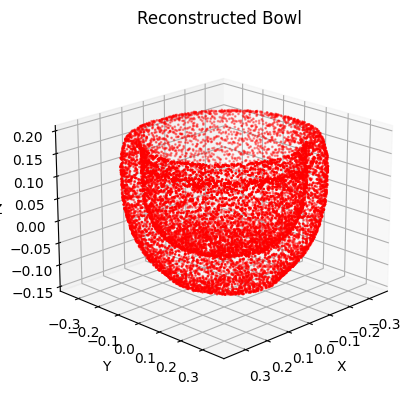

In [ ]:
# Example usage
obj = "bowl"
gt_mesh_file = f"{obj}/GT/Mesh_2.obj"
gt_mesh_path = os.path.join(GOOGLE_DRIVE_PATH, gt_mesh_file)
gen_mesh_file = f"{obj}/RT/Mesh_2.obj"
gen_mesh_path = os.path.join(GOOGLE_DRIVE_PATH, gen_mesh_file)
# print(gt_mesh_path)

gt_point_cloud = mesh_to_point_cloud(gt_mesh_path)
gen_point_cloud = mesh_to_point_cloud(gen_mesh_path)

# Plot the point cloud
plot_point_clouds(gt_point_cloud, gen_point_cloud)

# single_chamfer_dist_value = chamfer_distance(gt_point_cloud, gen_point_cloud)
# print(f"Chamfer Distance: {single_chamfer_dist_value}")

In [115]:
import os

def compare_chamfer_distances(obj):
    """
    Compare chamfer distances for all objects in the GT and RT folders.

    obj: Object name (e.g., "mug")

    Prints chamfer distances for each object.
    """

    # Construct folder paths
    gt_folder = os.path.join(GOOGLE_DRIVE_PATH, f"{obj}/GT")
    rt_folder = os.path.join(GOOGLE_DRIVE_PATH, f"{obj}/RT")

    # List all .obj files in the GT and RT folders
    gt_files = [file for file in os.listdir(gt_folder) if file.endswith(".obj")]
    rt_files = [file for file in os.listdir(rt_folder) if file.endswith(".obj")]

    # Ensure the number of objects is the same in GT and RT folders
    assert len(gt_files) == len(rt_files), "Number of objects in GT and RT folders should be the same."
    tot = 0
    # Iterate through objects and compute chamfer distance
    for i in range(1, len(gt_files) + 1):
        # Construct file paths for the current object
        gt_mesh_file = f"{obj}/GT/Mesh_{i}.obj"
        gt_mesh_path = os.path.join(GOOGLE_DRIVE_PATH, gt_mesh_file)
        # print(gt_mesh_path)

        gen_mesh_file = f"{obj}/RT/Mesh_{i}.obj"
        gen_mesh_path = os.path.join(GOOGLE_DRIVE_PATH, gen_mesh_file)
        # print(gen_mesh_path)

        # Load ground truth and generated point clouds
        gt_point_cloud = mesh_to_point_cloud(gt_mesh_path, True)
        gen_point_cloud = mesh_to_point_cloud(gen_mesh_path)

        # Compute chamfer distance
        chamfer_dist_value = chamfer_distance(gt_point_cloud, gen_point_cloud)

        # Print chamfer distance for the current object
        print(f"Chamfer Distance for {obj} Object {i}: {chamfer_dist_value}")
        tot += chamfer_dist_value

    print(f"Average Chamfer Distance for all {obj}s: {tot/len(gt_files)}")


In [118]:
# Example usage
obj_name = "mug"
compare_chamfer_distances(obj_name)

Chamfer Distance for mug Object 1: 40.99001437401348
Chamfer Distance for mug Object 2: 33.898042850284625
Chamfer Distance for mug Object 3: 35.55711045016684
Chamfer Distance for mug Object 4: 45.87476798217434
Chamfer Distance for mug Object 5: 39.12684668252108
Chamfer Distance for mug Object 6: 83.74150101019518
Chamfer Distance for mug Object 7: 45.07303093087406
Chamfer Distance for mug Object 8: 112.3184689596425
Chamfer Distance for mug Object 9: 22.908348575032036
Average Chamfer Distance for all mugs: 51.05423686832268
